This notebook does the following:

    generates n_loop random walk polymer chains
    calculates the end-to-end distance
    plots the distances in a historgram

Dependencies:

    pymatgen(latest development version from github)
    Polymers

Required input files:

    structures of start, bulk and terminal monomer molecules
    appropriately formatted yaml forcefield data file

In [1]:
import numpy as np

from pymatgen import Molecule
from pymatgen.io.babel import BabelMolAdaptor 

from polymers.core import Polymer

import matplotlib.pyplot as plt

%matplotlib inline

Set the start, bulk, and terminal molecules. Also set the forcefield species name mapping

In [2]:
# start molecule
peo_start = Molecule.from_file("PEOmonomer_start.xyz")
s_head = 0
s_tail = 5

# chain molecule
peo_bulk = Molecule.from_file("PEOmonomer_bulk.xyz")
head = 0
tail = 4

# terminal molecule
peo_end = Molecule.from_file("PEOmonomer_end.xyz")
e_head = 0
e_tail = 4

#len(peo_start.sites)

Create polymer via random walk

In [3]:
n_units = 50
link_distance = 1.5075
n_loop = 50
# number of sites from the end to e_tail
# index from the end of the monomer instead of the start
tail_e = 3
# list of end-to-end distances
end_to_end_list = []


# create the polymer, calc end-to-end distance, append value to list
for i in range(n_loop):
    peo_polymer = Polymer(peo_start, s_head, s_tail, 
                          peo_bulk, head, tail, 
                          peo_end, e_head, e_tail, 
                          n_units, link_distance)
    start_atom_i = s_head
    end_atom_i = (len(peo_polymer.molecule.sites)- tail_e)
    end_to_end = peo_polymer.molecule.get_distance(start_atom_i,end_atom_i)
    end_to_end_list.append(end_to_end)

#print len(end_to_end_list)

avg_ete = np.average(end_to_end_list)
stdev_ete = np.std(end_to_end_list)

Gaussian distribution
mu = mean
sigma = stdev

In [4]:
def gauss(x, mu, sigma):
    return (1/(np.sqrt(2*np.pi)*sigma)) * np.exp(-np.square(x-mu)/(2*np.square(sigma)))

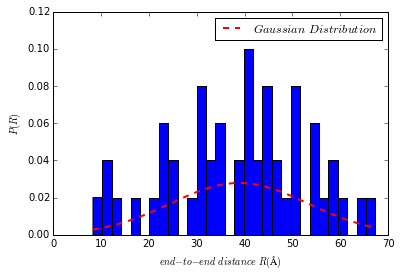

In [5]:
plt.figure()
plt.ylabel('$P(R)$')
plt.xlabel('$end-to-end$ $distance$ $R$$(\AA)$')
weights = np.ones_like(end_to_end_list) / float(len(end_to_end_list))
n,bins,weights = plt.hist(end_to_end_list, 30, weights=weights)
gauss_dist = [gauss(x, avg_ete, stdev_ete) for x in bins]
plt.plot(bins, gauss_dist, 'r--', lw=2)
plt.legend(['$Gaussian$ $Distribution$'], loc='best')
plt.show()